# Problem statement

Car Dekho is company which deals in used cars, this data have information about all the cars which are offered or registered in the portal to be sold. The data have various information like name of the car, Kilometer driven, mileage, engine power,age of the car etc. In this section using various function of tidyverse package we have cleaned the data

In this note book we will explore the data set of Car Dekho. The data set is about second hand cars and various features of the Cars. The Notebook will contain an Exploratory Data analysis, a Regression Model and Finally a Simple Supervised Machine Learning Model.

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [148]:
dataset = pd.read_csv('car_details.csv')
dataset.head(5)

,Car_Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Mileage,Engine,Seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,5.0


In [149]:
dataset.shape

(8128, 11)

In [150]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       8128 non-null   object 
 1   Year           8128 non-null   int64  
 2   Selling_Price  8128 non-null   int64  
 3   Km_Driven      8128 non-null   int64  
 4   Fuel           8128 non-null   object 
 5   Seller_Type    8128 non-null   object 
 6   Transmission   8128 non-null   object 
 7   Owner          8128 non-null   object 
 8   Mileage        7907 non-null   float64
 9   Engine         7907 non-null   float64
 10  Seats          7907 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 698.6+ KB


In [151]:
########################## Checking null values in each feature #################################
dataset.isnull().sum()

Car_Name           0
Year               0
Selling_Price      0
Km_Driven          0
Fuel               0
Seller_Type        0
Transmission       0
Owner              0
Mileage          221
Engine           221
Seats            221
dtype: int64

In [152]:
########## Since the null values in Mileage, Engine and Seats are greater than 2% (2.7%) . So we have to impute. Replacing null values in categorical column by mode and numerical column by median

dataset['Seats'].fillna(dataset['Seats'].mode()[0], inplace = True)
dataset['Engine'].fillna(dataset['Engine'].median(), inplace = True)
dataset['Mileage'].fillna(dataset['Mileage'].median(), inplace = True)

In [153]:
dataset.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Km_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
Mileage          0
Engine           0
Seats            0
dtype: int64

# Explanatory Data Analysis

# Univariate Analysis

1.which top 10 vehicle company is in more for sale ?

In [154]:
import plotly.express as px

px.pie(data_frame = dataset ,names = dataset.Car_Name.value_counts().head(10).index, values = dataset.Car_Name.value_counts().values[0:10],
      title = "Top 10 vehicle company is more for sale",hole = 0.7
      )

2 . which year more number of vehicle are being available for second's ?

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, "year v/s vehicle's availabel for second's ")

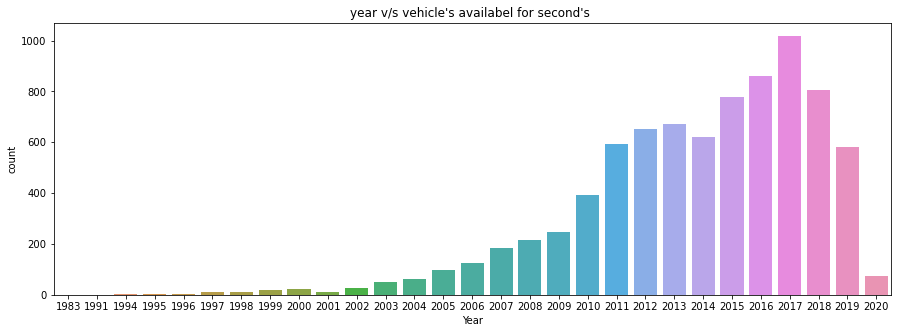

In [155]:
plt.figure(figsize = (15,5))
sns.countplot(dataset['Year'])
plt.title("year v/s vehicle's availabel for second's ")

3.which type of fuel used by most of the vehicle ?

In [156]:
px.pie(data_frame = dataset ,names = dataset.Fuel.value_counts().index,values = dataset.Fuel.value_counts().values,
      title = "vehicle fuel " ,hole = 0.7
      )

4.which type of transmission used by most of the vehicle ?

In [157]:
px.pie(data_frame = dataset ,names = dataset.Transmission.value_counts().index,values = dataset.Transmission.value_counts().values,
      title = "vehicle fuel type " ,hole = 0.7
      )

5.seller type

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Seller_Type', ylabel='count'>

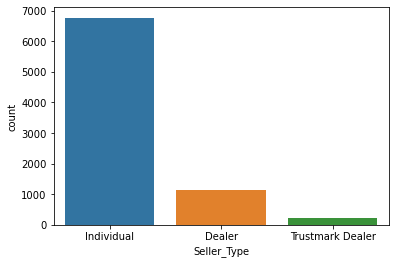

In [158]:
sns.countplot(dataset['Seller_Type'])

Seats

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Seats', ylabel='count'>

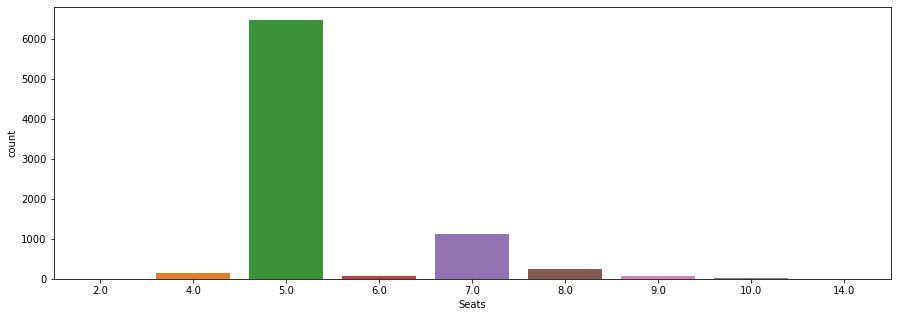

In [159]:
plt.figure(figsize = (15,5))
sns.countplot(dataset['Seats'])

Owner

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Owner', ylabel='count'>

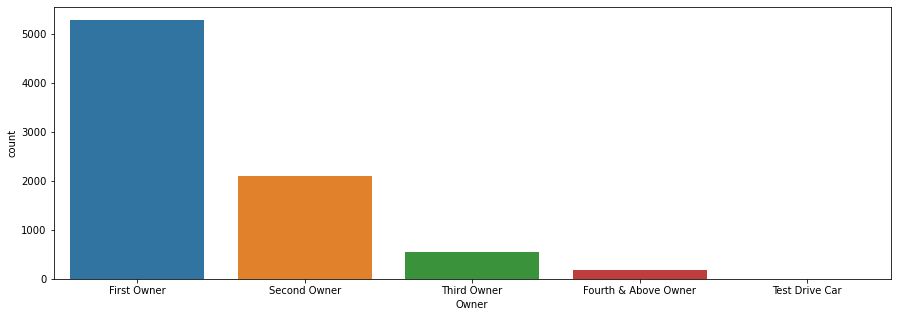

In [160]:
plt.figure(figsize = (15,5))
sns.countplot(dataset['Owner'])

# Bivariate Analysis

In [161]:
dataset.head(5)

,Car_Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Mileage,Engine,Seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,5.0


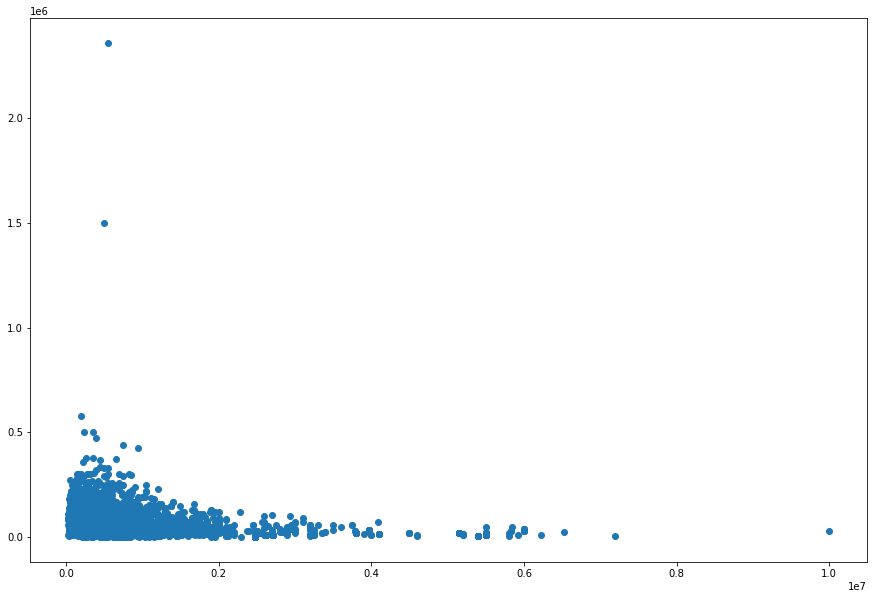

In [162]:
################ Selling Price vs Km_Driven

plt.figure(figsize = (15,10))
plt.scatter(dataset.Selling_Price, dataset.Km_Driven)

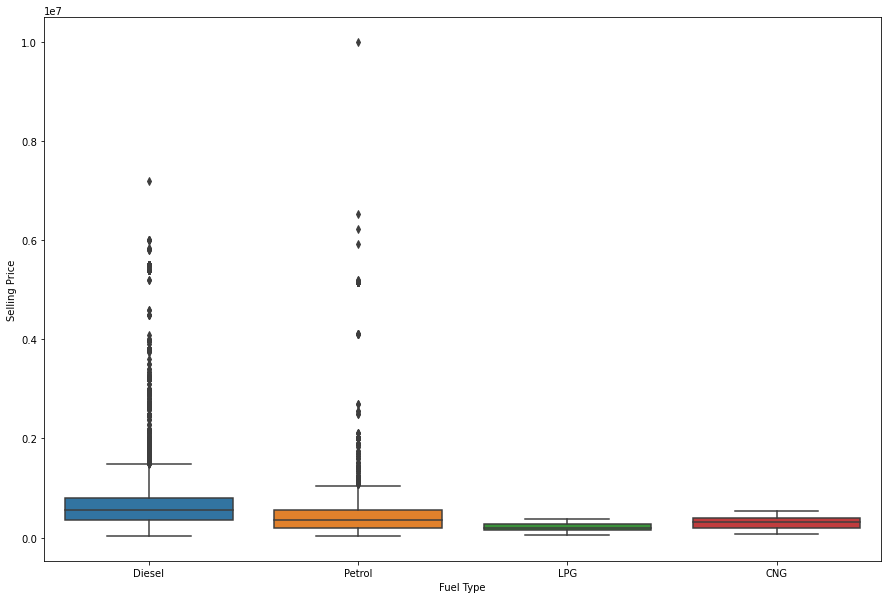

In [163]:
################ Selling Price vs Fuel

plt.figure(figsize = (15,10))
sns.boxplot(x = 'Fuel' , y = 'Selling_Price' , data = dataset )
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()

<AxesSubplot:xlabel='Fuel', ylabel='Count'>

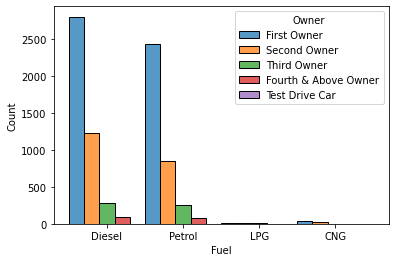

In [164]:
################ Fuel vs Owner

sns.histplot(binwidth=1,
            x= 'Fuel',
            hue='Owner',
            data=dataset,
            stat="count",
            multiple="dodge")

The first owner , second owner, third owner etc of Diesel is in large numbers as compared to Petrol . So this maybe the reason why the selling price of diesel is higher than petrol

<AxesSubplot:xlabel='Fuel', ylabel='Count'>

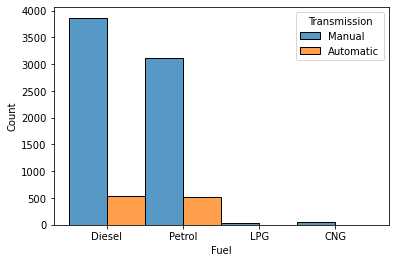

In [165]:
################ Fuel vs Transmission
#(for checking why the selling price of diesel is more than petrol. But looking at the fuel vs transmission graph, it's not a valid justification)
sns.histplot(binwidth=1,
            x= 'Fuel',
            hue='Transmission',
            data=dataset,
            stat="count",
            multiple="dodge")

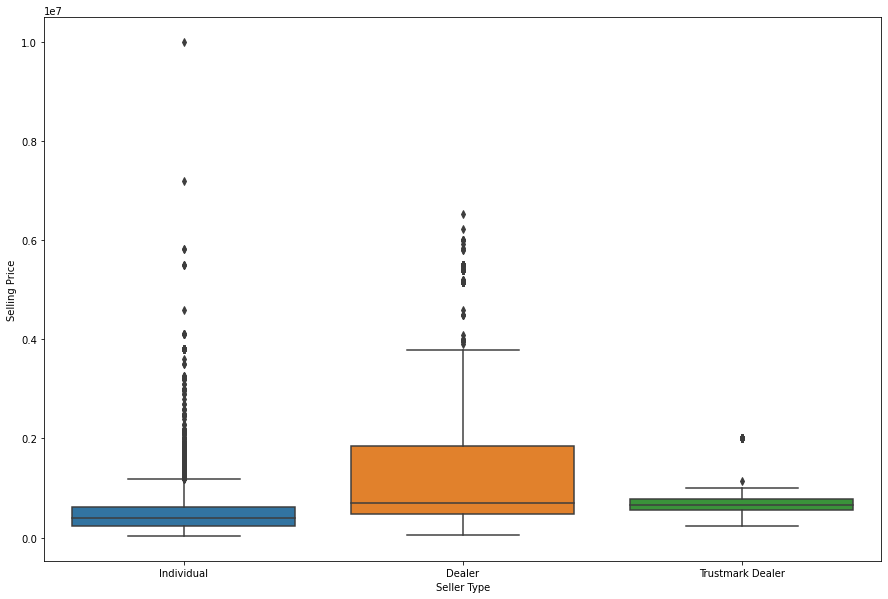

In [166]:
################ Selling Price vs Seller_Type

plt.figure(figsize = (15,10))
sns.boxplot(x = 'Seller_Type' , y = 'Selling_Price' , data = dataset )
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.show()

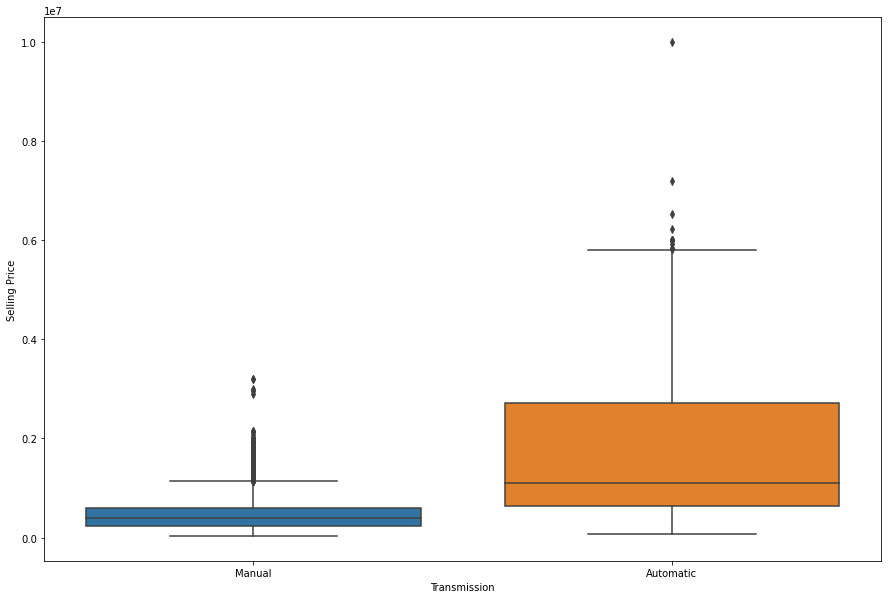

In [167]:
################ Selling Price vs Transmission

plt.figure(figsize = (15,10))
sns.boxplot(x = 'Transmission' , y = 'Selling_Price' , data = dataset )
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.show()

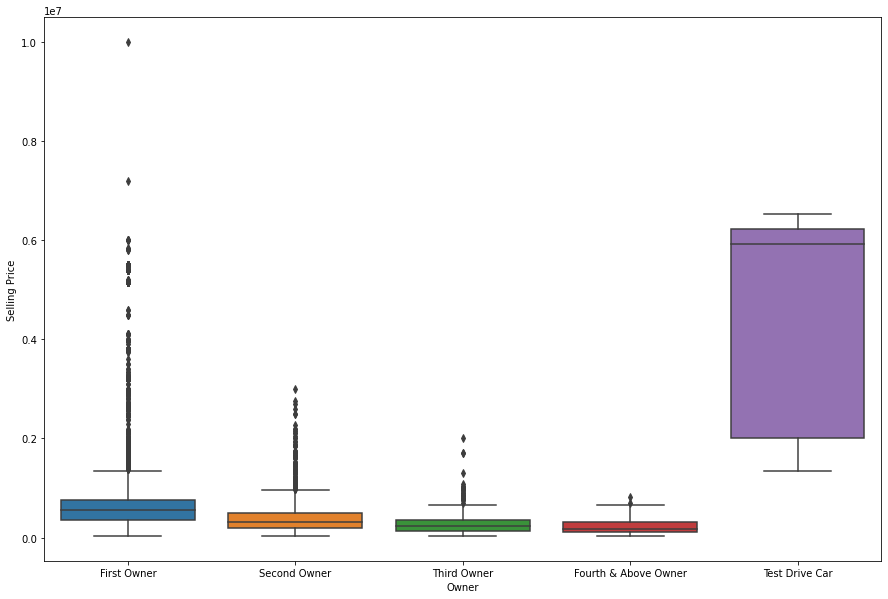

In [168]:
################ Selling Price vs Owner

plt.figure(figsize = (15,10))
sns.boxplot(x = 'Owner' , y = 'Selling_Price' , data = dataset )
plt.xlabel('Owner')
plt.ylabel('Selling Price')
plt.show()

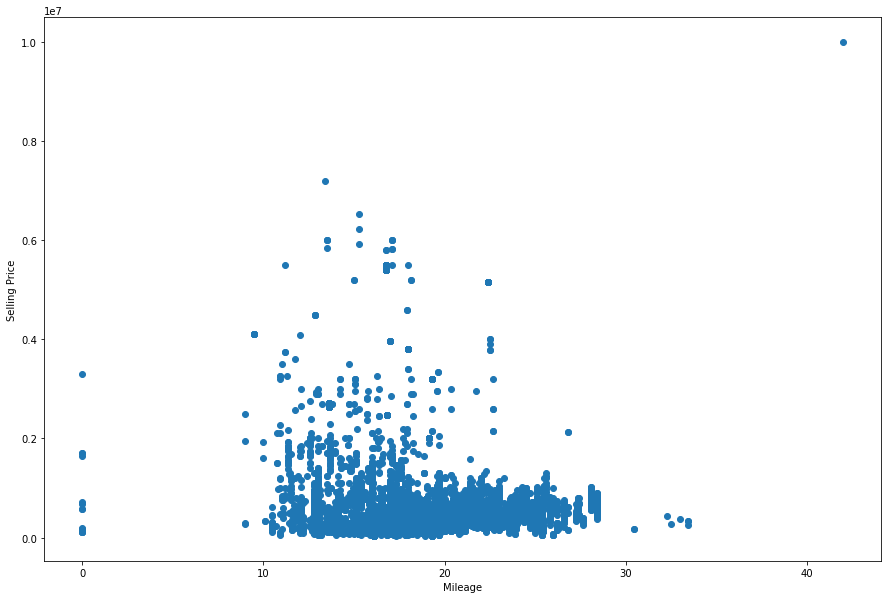

In [169]:
################ Selling Price vs Mileage

plt.figure(figsize = (15,10))
plt.scatter(dataset.Mileage, dataset.Selling_Price)
plt.xlabel('Mileage')
plt.ylabel('Selling Price')
plt.show()

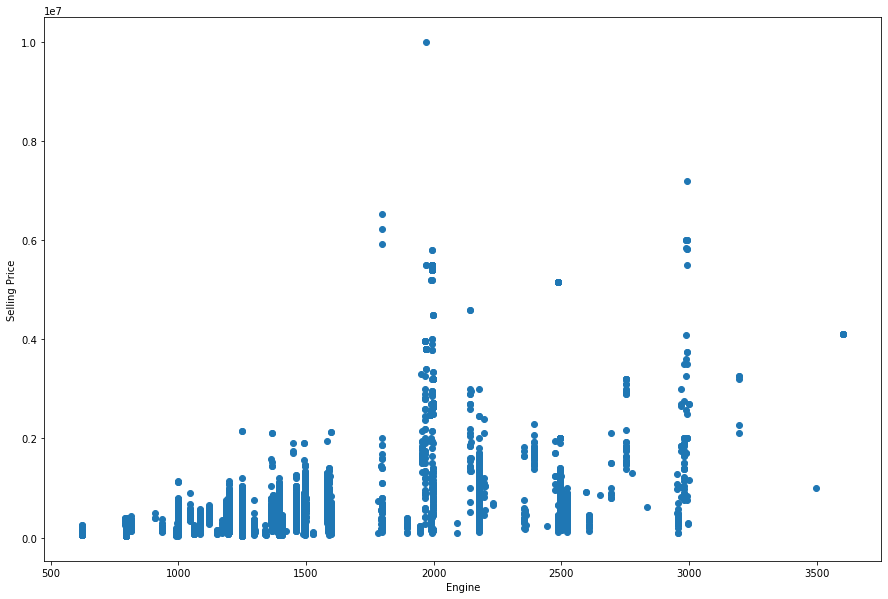

In [170]:
################ Selling Price vs Engine

plt.figure(figsize = (15,10))
plt.scatter(dataset.Engine, dataset.Selling_Price)
plt.xlabel('Engine')
plt.ylabel('Selling Price')
plt.show()

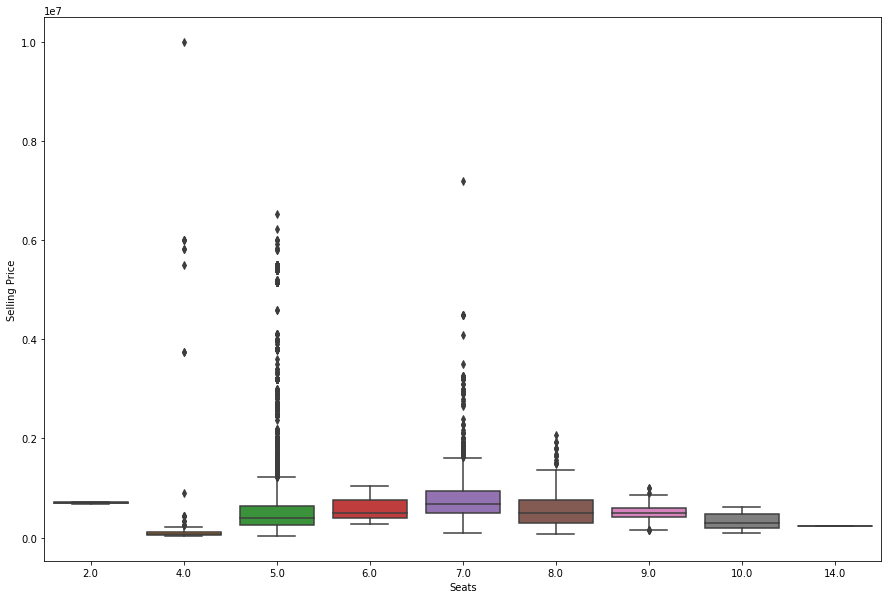

In [171]:
################ Selling Price vs Seats

plt.figure(figsize = (15,10))
sns.boxplot(x = 'Seats' , y = 'Selling_Price' , data = dataset )
plt.xlabel('Seats')
plt.ylabel('Selling Price')
plt.show()

In [172]:
dataset.describe()

,Year,Selling_Price,Km_Driven,Mileage,Engine,Seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.00000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.415554,1452.89813,5.405389
std,4.044249,8.062534e+05,5.655055e+04,3.981922,498.19672,0.948874
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.00000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.800000,1197.00000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.00000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.277500,1582.00000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.00000,14.000000


In [173]:
dataset.corr()

,Year,Selling_Price,Km_Driven,Mileage,Engine,Seats
Year,1.000000,0.414092,-0.418006,0.311657,0.035851,0.010222
Selling_Price,0.414092,1.000000,-0.225534,-0.125040,0.458345,0.047135
Km_Driven,-0.418006,-0.225534,1.000000,-0.171746,0.198911,0.219860
Mileage,0.311657,-0.125040,-0.171746,1.000000,-0.574128,-0.450578
Engine,0.035851,0.458345,0.198911,-0.574128,1.000000,0.612220
Seats,0.010222,0.047135,0.219860,-0.450578,0.612220,1.000000


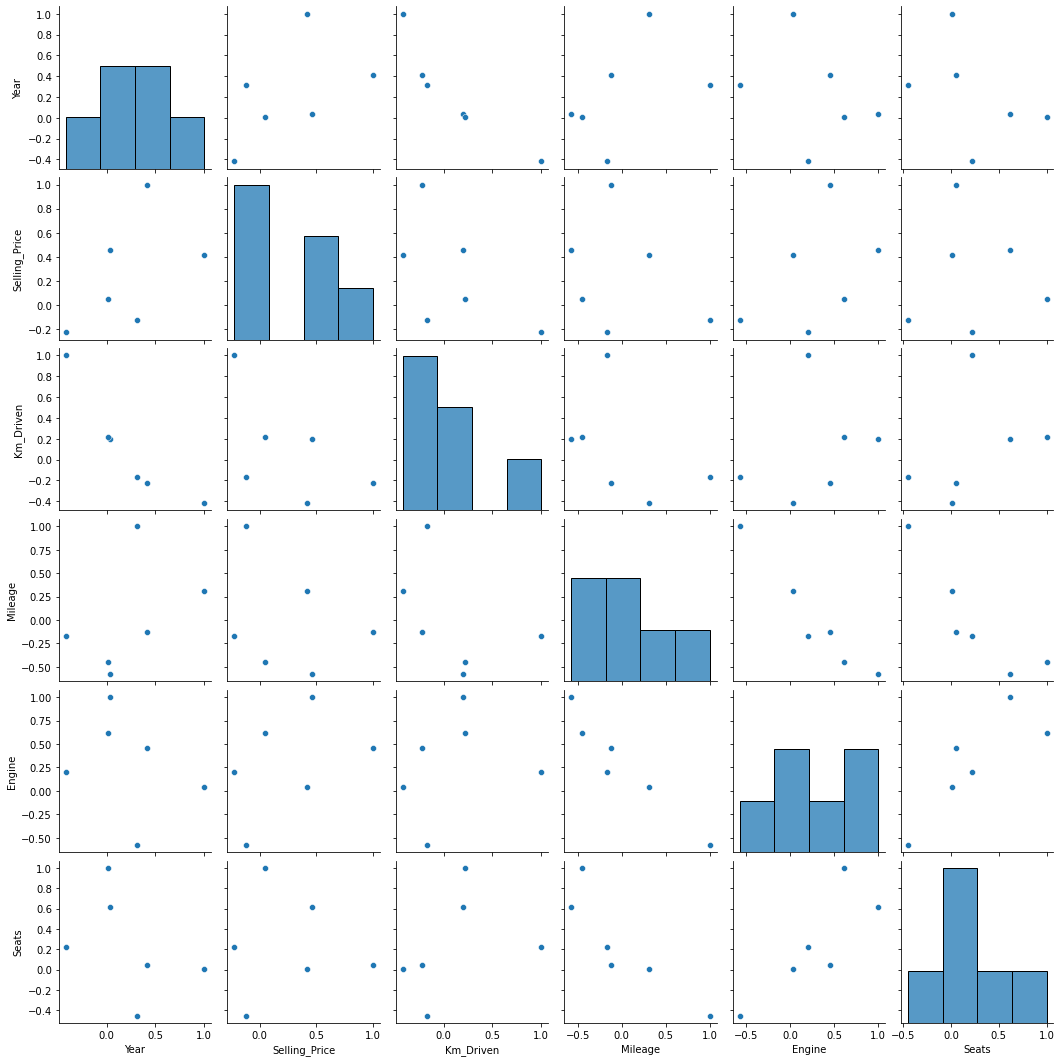

In [174]:
################### Visualizing correlation between features using pairplot ###########################

sns.pairplot(dataset.corr())

<AxesSubplot:>

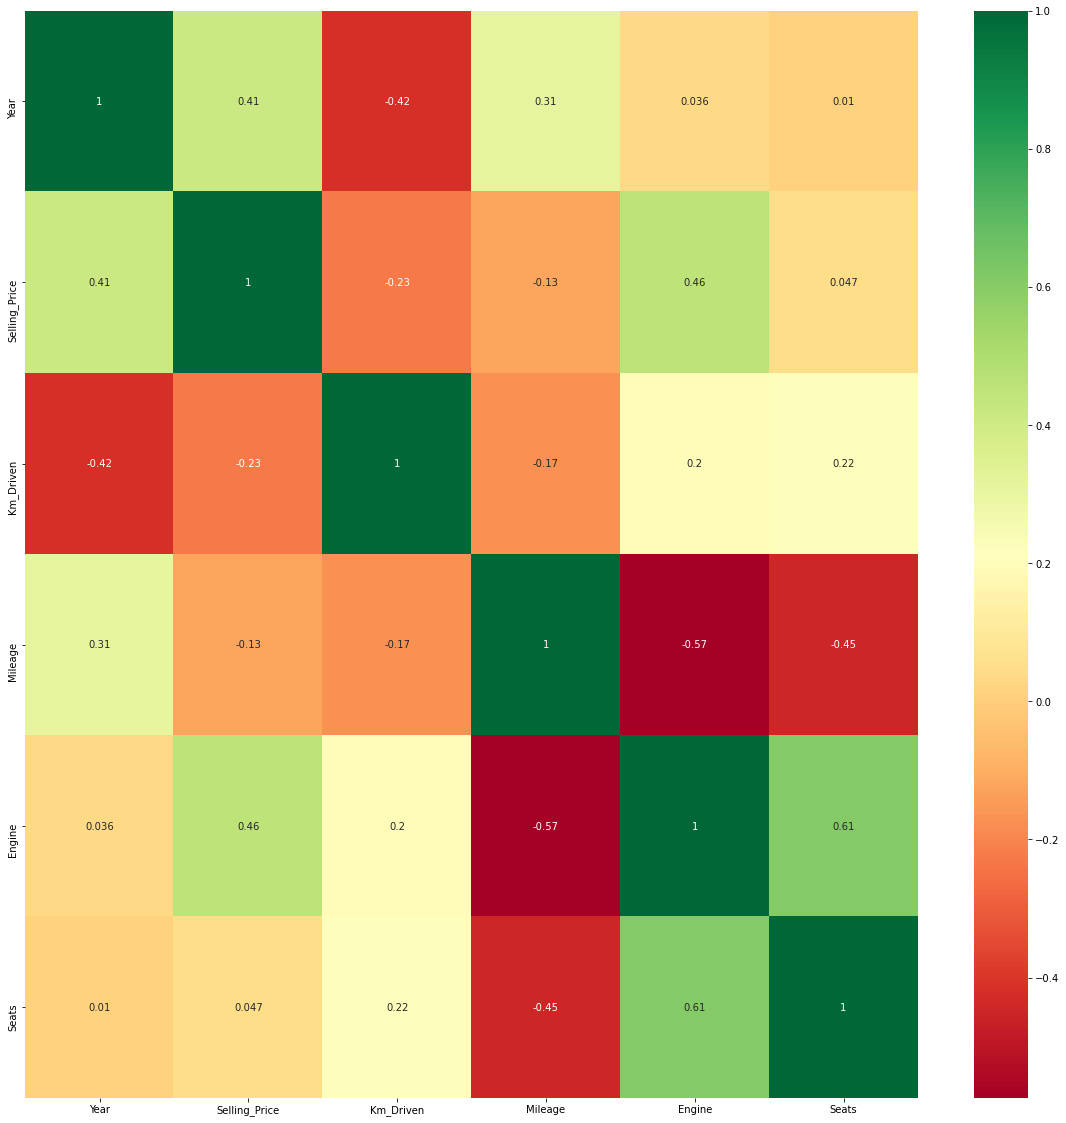

In [175]:
################### Visualizing correlation between features using heatmap ###########################

%matplotlib inline
plt.figure(figsize = (20,20))
sns.heatmap(dataset.corr(), cmap = 'RdYlGn', annot = True)

# Data Exploration

In [176]:
######## Checking unique values in the categorical columns of Fuel_Type, Seller_Type,Transmission and Owner ##############

print(dataset['Fuel'].unique())
print(dataset['Seller_Type'].unique())
print(dataset['Transmission'].unique())
print(dataset['Owner'].unique())
print(dataset['Seats'].unique())

['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
[ 5.  4.  7.  8.  6.  9. 10. 14.  2.]


In [177]:
################ Creating a new feature of number of years from Year feature for checking how old the car is ###################

dataset['no_year'] = 2022 - dataset['Year']
dataset.head(5)

,Car_Name,Year,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Mileage,Engine,Seats,no_year
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,5.0,8
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,5.0,8
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,5.0,16
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,5.0,12
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,5.0,15


In [178]:
########## Dropping Car_Name and Year column from dataset #########################

dataset = dataset[['Selling_Price','Km_Driven','Fuel','Seller_Type','Transmission', 'Owner','Mileage','Engine','Seats','no_year']]
dataset.head(5)

,Selling_Price,Km_Driven,Fuel,Seller_Type,Transmission,Owner,Mileage,Engine,Seats,no_year
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,5.0,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,5.0,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,5.0,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,5.0,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,5.0,15


In [179]:
############# Converting categorical features into dummy variables #########################
final_dataset = pd.get_dummies(dataset , drop_first = True )
final_dataset.head()

,Selling_Price,Km_Driven,Mileage,Engine,Seats,no_year,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
0,450000,145500,23.40,1248.0,5.0,8,1,0,0,1,0,1,0,0,0,0
1,370000,120000,21.14,1498.0,5.0,8,1,0,0,1,0,1,0,1,0,0
2,158000,140000,17.70,1497.0,5.0,16,0,0,1,1,0,1,0,0,0,1
3,225000,127000,23.00,1396.0,5.0,12,1,0,0,1,0,1,0,0,0,0
4,130000,120000,16.10,1298.0,5.0,15,0,0,1,1,0,1,0,0,0,0


In [180]:
################## Separating dependent and independent variables from final dataset ######################
x = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0:1]

In [181]:
x.head()

,Km_Driven,Mileage,Engine,Seats,no_year,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
0,145500,23.40,1248.0,5.0,8,1,0,0,1,0,1,0,0,0,0
1,120000,21.14,1498.0,5.0,8,1,0,0,1,0,1,0,1,0,0
2,140000,17.70,1497.0,5.0,16,0,0,1,1,0,1,0,0,0,1
3,127000,23.00,1396.0,5.0,12,1,0,0,1,0,1,0,0,0,0
4,120000,16.10,1298.0,5.0,15,0,0,1,1,0,1,0,0,0,0


In [182]:
y.head()

,Selling_Price
0,450000
1,370000
2,158000
3,225000
4,130000


# Selecting important features by RFE

In [183]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import ElasticNet
rfe = RFE(estimator = ElasticNet())
rfe.fit(x,y)

RFE(estimator=ElasticNet())

In [184]:
for i,col in zip(range(x.shape[1]), x.columns):
    print(f"{col} selected = {rfe.support_[i]} rank = {rfe.ranking_[i]}")

Km_Driven selected = False rank = 9
Mileage selected = False rank = 8
Engine selected = False rank = 7
Seats selected = True rank = 1
no_year selected = True rank = 1
Fuel_Diesel selected = True rank = 1
Fuel_LPG selected = False rank = 6
Fuel_Petrol selected = True rank = 1
Seller_Type_Individual selected = True rank = 1
Seller_Type_Trustmark Dealer selected = False rank = 2
Transmission_Manual selected = True rank = 1
Owner_Fourth & Above Owner selected = False rank = 5
Owner_Second Owner selected = True rank = 1
Owner_Test Drive Car selected = False rank = 3
Owner_Third Owner selected = False rank = 4


In [185]:
x = x.drop(['Km_Driven','Engine', 'Mileage'],axis = 1)

In [186]:
x.head()

,Seats,no_year,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
0,5.0,8,1,0,0,1,0,1,0,0,0,0
1,5.0,8,1,0,0,1,0,1,0,1,0,0
2,5.0,16,0,0,1,1,0,1,0,0,0,1
3,5.0,12,1,0,0,1,0,1,0,0,0,0
4,5.0,15,0,0,1,1,0,1,0,0,0,0


# Data splitting and model fitting 

In [187]:
######################### Creating train-test split from x and y ##########################

from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [188]:
x_train

,Seats,no_year,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner
5224,5.0,5,0,0,1,1,0,1,0,0,0,0
520,5.0,10,0,0,1,1,0,1,0,0,0,0
36,5.0,3,0,0,1,1,0,1,0,0,0,0
5782,5.0,4,1,0,0,1,0,1,0,0,0,0
6522,8.0,7,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4931,5.0,10,1,0,0,1,0,1,0,0,0,1
3264,5.0,10,1,0,0,1,0,1,0,1,0,0
1653,5.0,13,0,0,1,1,0,1,0,1,0,0
2607,5.0,10,1,0,0,1,0,1,0,0,0,0


# Feature Scaling

In [189]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [190]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [191]:
elastic = ElasticNet()
parameters = {'alpha' : [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
elastic_regressor = GridSearchCV(elastic, parameters, cv = 5 , scoring = 'neg_mean_squared_error')
elastic_regressor.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 687889372420265.2, tolerance: 284910163398.5409

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 729654129248168.9, tolerance: 301222256542.8685

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 721292400124171.2, tolerance: 285583677455.8211

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 729872332635496.0, tolerance:

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [192]:
print(elastic_regressor.best_params_)
print(elastic_regressor.best_score_)

{'alpha': 0.001}
-318644382279.6463


In [193]:
y_pred = elastic_regressor.predict(x_test)
y_pred = y_pred.round(decimals = 2)
y_pred

array([ 550424.18,  592462.49, 1661935.79, ...,  739238.8 ,  663431.04,
        734073.45])

# Evaluating the performance of model

In [194]:
y_test_v1 = y_test.values

In [195]:
check = np.concatenate((y_test_v1.reshape(len(y_test_v1),1), y_pred.reshape(len(y_pred),1)),1)
check

array([[ 345000.  ,  550424.18],
       [ 900000.  ,  592462.49],
       [ 475000.  , 1661935.79],
       ...,
       [ 700000.  ,  739238.8 ],
       [ 650000.  ,  663431.04],
       [ 750000.  ,  734073.45]])

In [196]:
################ Checking the accuracy of model by r2_score
from sklearn.metrics import r2_score
r2_score(y_test_v1,y_pred)

0.47996026226912314

In [197]:
################ Checking the accuracy of model by MSE
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test_v1,y_pred))

MSE 347763131115.7579


In [198]:
################ Checking the accuracy of model by RMSE
from sklearn.metrics import mean_squared_error
print("RMSE", np.sqrt(mean_squared_error(y_test_v1,y_pred)))

RMSE 589714.4487934461


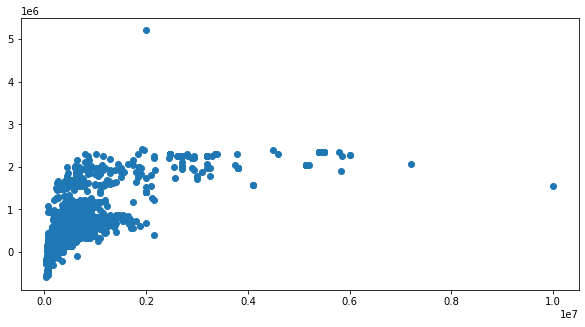

In [199]:
plt.figure(figsize = (10,5))
plt.scatter(y_test_v1, y_pred)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

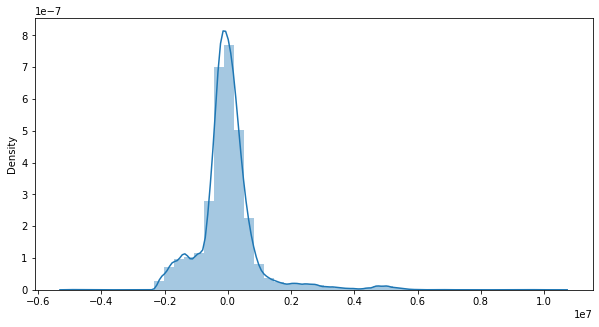

In [200]:
plt.figure(figsize = (10,5))
sns.distplot(y_test_v1 - y_pred)